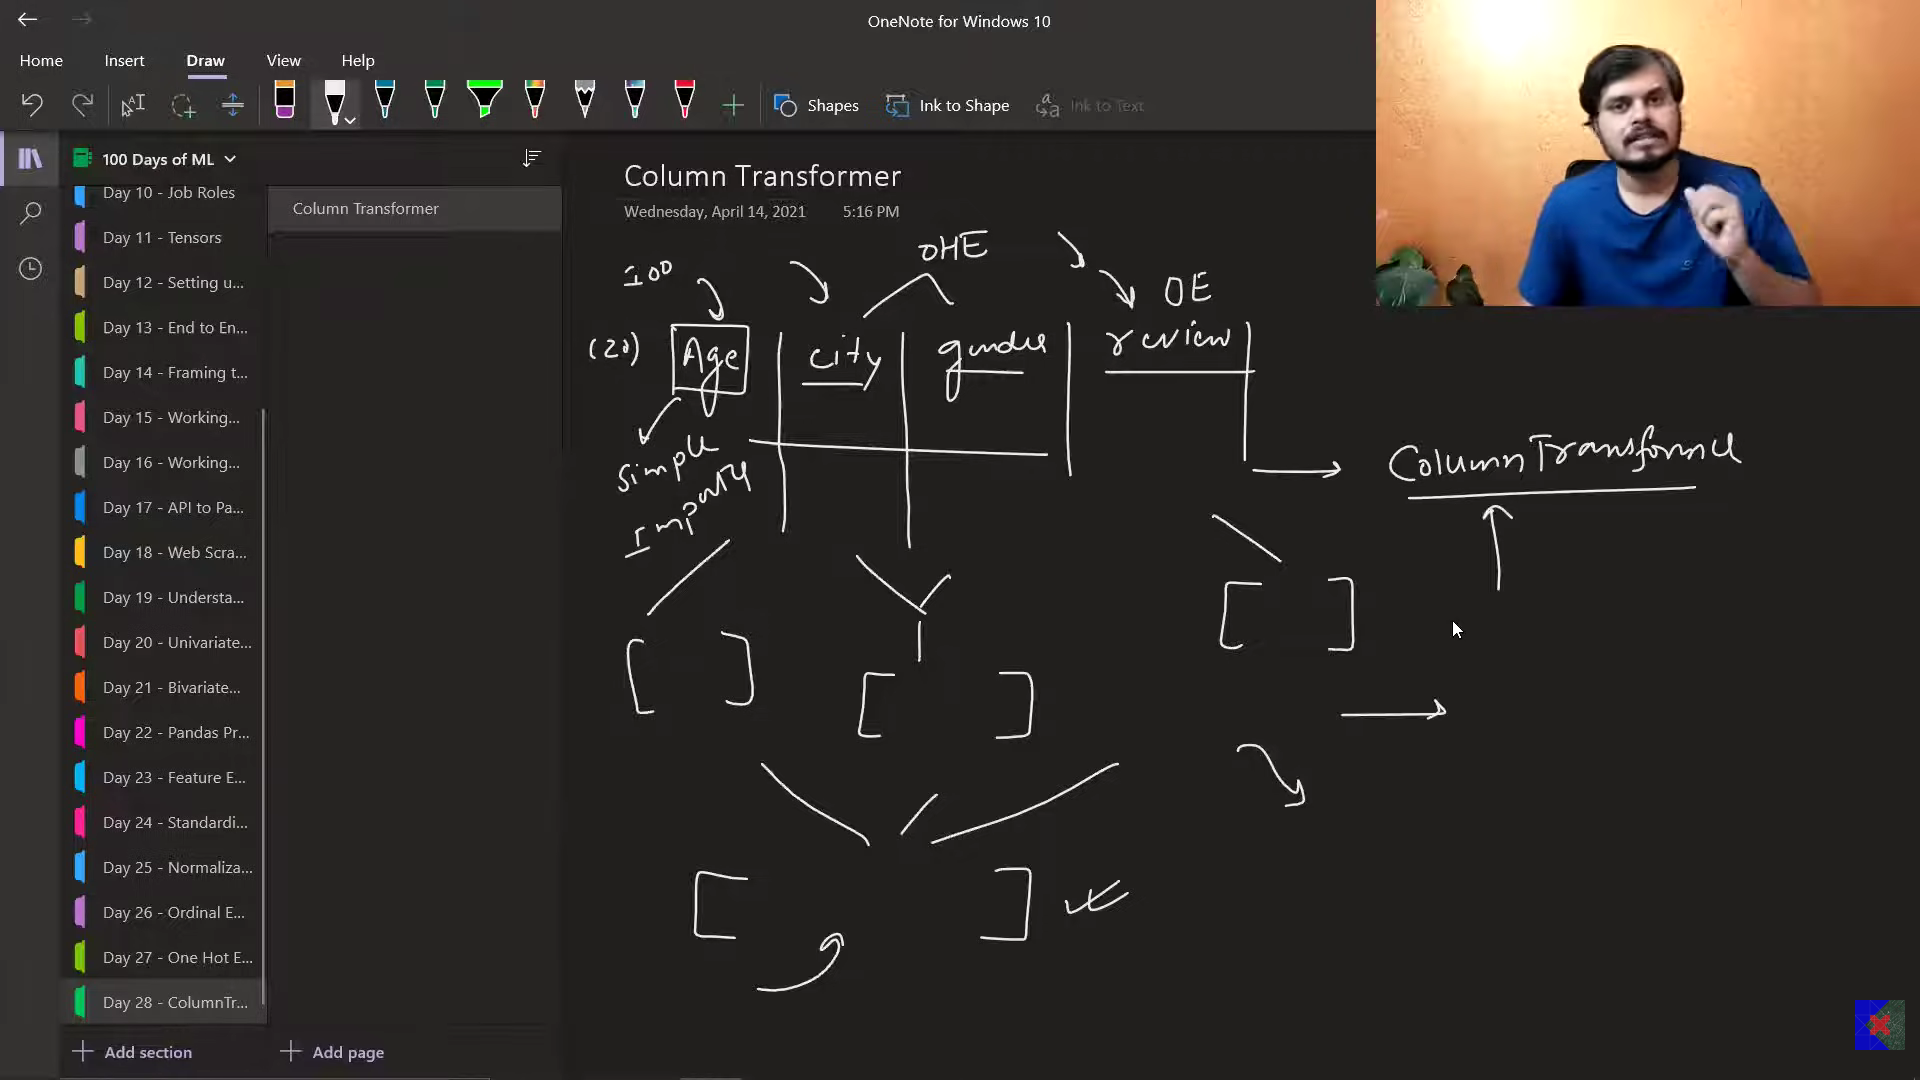

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('covid_toy.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


Numerical -> age, fever  
Categorical Nominal -> gender, city  
Cough Ordinal -> Cough

In [7]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [6]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [5]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [10]:
X_train

,age,gender,fever,cough,city
37,55,Male,100.0,Mild,Kolkata
94,79,Male,NaN,Strong,Kolkata
22,71,Female,98.0,Strong,Kolkata
91,38,Male,NaN,Mild,Delhi
89,46,Male,103.0,Strong,Bangalore
...,...,...,...,...,...
45,72,Male,99.0,Mild,Bangalore
18,64,Female,98.0,Mild,Bangalore
82,24,Male,98.0,Mild,Kolkata
57,49,Female,99.0,Strong,Bangalore


## 1. Aam Zindagi

In [15]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever.shape

(80, 1)

In [18]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [21]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city

array([[1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],


In [22]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [23]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

## Mentos Zindagi

In [24]:
from sklearn.compose import ColumnTransformer

In [27]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [30]:
transformer.fit_transform(X_train)


array([[100.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  55.        ],
       [100.79452055,   1.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  79.        ],
       [ 98.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  71.        ],
       [100.79452055,   0.        ,   1.        ,   1.        ,
          0.        ,   0.        ,  38.        ],
       [103.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  46.        ],
       [ 98.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   5.        ],
       [102.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  82.        ],
       [101.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  68.        ],
       [ 98.        ,   0.        ,   1.        ,   1.        ,
          0.    

In [31]:
transformer.transform(X_test)

array([[103.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  60.        ],
       [100.79452055,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  75.        ],
       [ 98.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  10.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  19.        ],
       [100.79452055,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  42.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  38.        ],
       [100.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  27.        ],
       [100.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  11.        ],
       [ 98.        ,   1.        ,   1.        ,   0.        ,
          1.    

In [32]:
transformer.fit_transform(X_train).shape

(80, 7)

In [34]:
transformer.fit_transform(X_test).shape

(20, 7)